You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/fall22/Lectures/Class10-PenalizedRegression%20(Python)/regularization_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 



## 🔗 Links
[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=red)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)
[![Profile](https://img.shields.io/badge/profiole-000?style=for-the-badge&logo=ko-fi&logoColor=white)](https://huntsman.usu.edu/directory/jahangiry-pedram)
[![linkedin](https://img.shields.io/badge/linkedin-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

---

# Regularization: Penalized regression

Regularization force the learning algorithm to build a less complex model . In practice, that often leads to slightly higher bias but significantly reduces the variance. The most common penalized regression models are:

1. Ridge regression
2. Lasso regression
3. Elastic Net regression

In this notebook we will explore the three methods and compare their results with a multiple linear regression model applied to Boston Housing dataset. The target variable is **price** and the features are 13 variables listed below. 

First we need to import the libraries: 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [36]:
rand_state= 1000

In [94]:
!wget nc https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/fall22/data/boston_clean.csv
df = pd.read_csv("boston_clean.csv")

--2022-09-29 17:16:44--  http://nc/
Resolving nc (nc)... failed: No address associated with hostname.
wget: unable to resolve host address ‘nc’
--2022-09-29 17:16:44--  https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/fall22/data/boston_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39170 (38K) [text/plain]
Saving to: ‘boston_clean.csv’

boston_clean.csv    100%[===================>]  38.25K  --.-KB/s    in 0.009s  

2022-09-29 17:16:44 (4.01 MB/s) - ‘boston_clean.csv’ saved [39170/39170]

FINISHED --2022-09-29 17:16:44--
Total wall clock time: 0.4s
Downloaded: 1 files, 38K in 0.009s (4.01 MB/s)


In [95]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**important**: we need to normalize the features before training the models. Why? 


In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)
df_sc

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [99]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [100]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [101]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


###  Splitting the data

In [102]:
y = df_sc['price']
X = df_sc.drop('price', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
300,-0.415377,2.516647,-1.298123,-0.272599,-1.336307,0.835371,-0.752992,1.917048,-0.523001,-0.298373,-1.690182,0.374827,-0.922773
32,-0.258993,-0.487722,-0.437258,-0.272599,-0.144217,-0.476740,0.477404,0.092677,-0.637962,-0.601276,1.176466,-1.360392,2.110588
181,-0.412502,-0.487722,-1.266023,-0.272599,-0.576134,-0.200356,-0.226695,-0.569085,-0.752922,-1.278354,-0.303094,0.441052,-0.448985
272,-0.407181,0.370669,-0.609431,-0.272599,-0.783454,0.360960,-0.351157,0.058212,-0.752922,-1.100176,0.066796,0.419781,-0.690084
477,1.327804,-0.487722,1.015999,-0.272599,0.512296,-1.397069,1.021481,-0.805438,1.661245,1.530926,0.806576,-0.078878,1.718101


----

# A) Training the models 

In this section we will train 4 different models:
1. Linear regression (model_linear)
2. Ridge regression (model_ridge)
3. Lasso regression (model_lasso)
4. Elastic Net regression (model_net)

In [103]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [109]:
# starting with default parameters:
model_linear = LinearRegression()
model_ridge = Ridge(0)
model_lasso = Lasso(0)
model_net = ElasticNet(0)

In [110]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [111]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
483,-0.079757,-0.135567,-0.135567,-0.135567,-0.135567
426,-1.342272,-0.576960,-0.576960,-0.576960,-0.576960
22,-0.798084,-0.765351,-0.765351,-0.765351,-0.765351
268,2.282016,1.836136,1.836136,1.836136,1.836136
371,2.989460,0.310160,0.310160,0.310160,0.310160


### coefficients

In [112]:
df.drop('price', axis=1, inplace=False).columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [113]:
coefficients = pd.DataFrame({'Features':df.drop('price', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,CRIM,-0.119663,-0.119663,-0.119663,-0.119663
1,ZN,0.145891,0.145891,0.145891,0.145891
2,INDUS,0.001655,0.001655,0.001655,0.001655
3,CHAS,0.076963,0.076963,0.076963,0.076963
4,NOX,-0.260484,-0.260484,-0.260484,-0.260484
5,RM,0.257842,0.257842,0.257842,0.257842
6,AGE,0.000378,0.000378,0.000378,0.000378
7,DIS,-0.406295,-0.406295,-0.406295,-0.406295
8,RAD,0.294925,0.294925,0.294925,0.294925
9,TAX,-0.198364,-0.198364,-0.198364,-0.198364


----

### Performance in the test set

In [114]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.556

In [115]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,5)

0.55584

In [116]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.556

In [117]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.556

-------------

### Plotting the regression coefficients vs alphas:

#### 1) Ridge regression coefficients vs alpha

In [133]:
alpha_ridge = 10**np.linspace(0,5,100)

In [134]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 13)

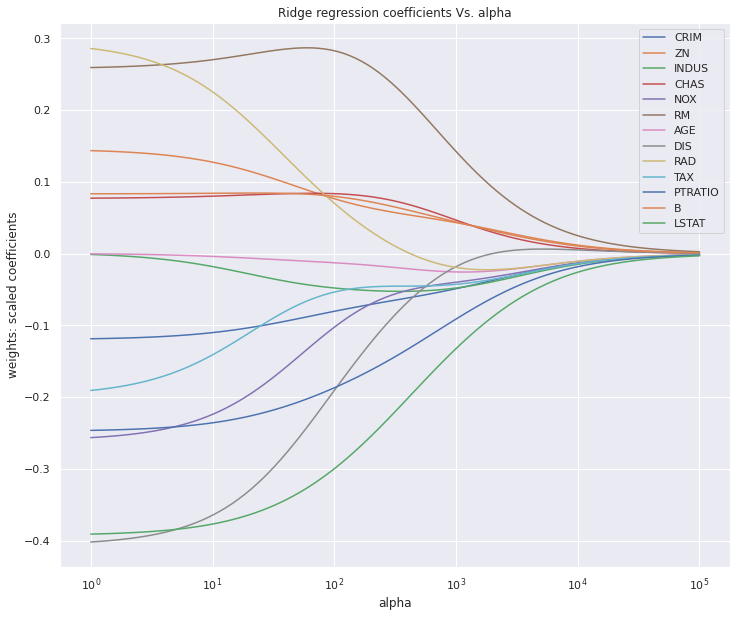

In [135]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

---

#### 2) Lasso regression coefficients vs alpha

In [145]:
alpha_lasso = 10**np.linspace(-3,1,100)

In [146]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 13)

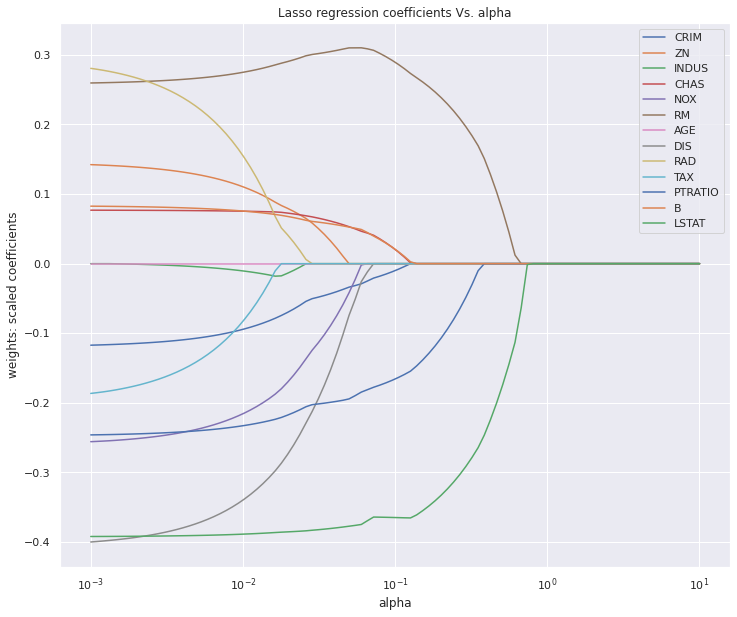

In [147]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

**Challenge**: Which coefficients survive when alpha = 0.1? 

---

#### 3) Elastic Net regression coefficients vs alpha

In [151]:
alpha_elasticnet = 10**np.linspace(-3,1,100)

In [152]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 13)

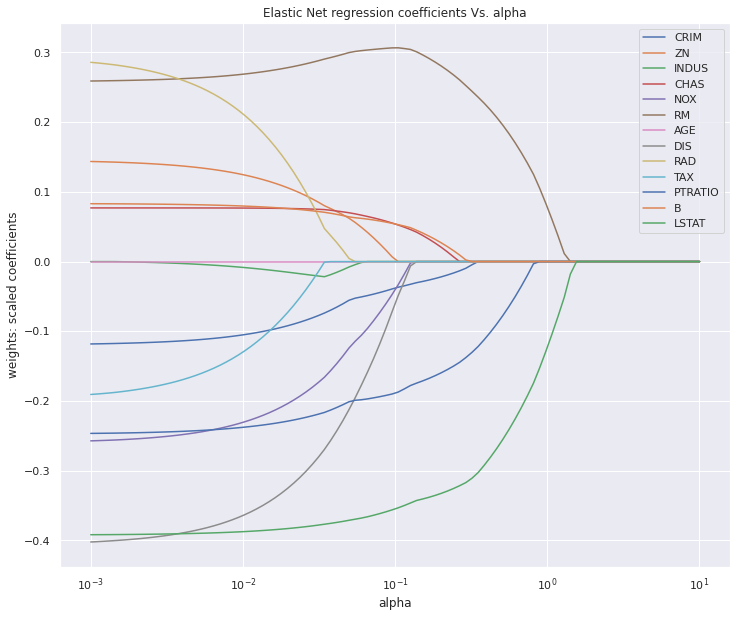

In [153]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

----

## Cross Validation 

Let's use cross validation to find the optimal Lambdas (alphas) for different models. 

#### 1) Optimal alpha for Ridge regression

In [157]:
ridgecv = RidgeCV(alphas=alpha_ridge)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

3.5938136638046276

In [155]:
alpha_ridge_opt = ridgecv.alpha_

----

#### 2) Optimal alpha for Lasso regression

In [158]:
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.0019666419672498417

In [159]:
alpha_lasso_opt = lassocv.alpha_

----

#### 3) Optimal alpha for Elastic Net regression

In [160]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.002975385053308794

In [161]:
elasticnetcv.l1_ratio_

0.5

In [162]:
alpha_elasticnet_opt = elasticnetcv.alpha_

----

#### Refit the models!

***Exercise***: Now go back and refit the 3 models with the optimal alphas! 
- compare the RMSE_test?
- were you able to beat the linear regression model?
- what do you conclude?

----

###  Additional links:
1- Underfitting vs Overfitting: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

2- A complete example: https://towardsdatascience.com/from-linear-regression-to-ridge-regression-the-lasso-and-the-elastic-net-4eaecaf5f7e6

3- Standardizing features in Python:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
